In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
data_origin = pd.read_csv("winemag-130k-v2.csv")

In [3]:
data_origin

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [4]:
head = data_origin.columns.tolist()
print(head)

['Unnamed: 0', 'country', 'description', 'designation', 'points', 'price', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


# Variables

## Points

In [5]:
Points = data_origin["points"]

In [6]:
Points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

#### Create a list that help classify the descriptions into pos_des and neg_des

In [7]:
Classify = []
#count1 = 0
#count0 = 0
for i in range(Points.shape[0]):
    if Points[i] > 88:
        Classify.append(1)
        #count1 += 1
    else:
        Classify.append(0)
        #count0 += 1

#### Create a new data with tag

In [8]:
data = pd.concat([data_origin,pd.DataFrame(Classify, columns=['tag'])],axis=1)
#print(data_withtag)

In [9]:
#define a data cleaning function to clean the natural language data 

import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
from sklearn.feature_extraction import _stop_words

# Now you can use stop_words in your code


tok = WordPunctTokenizer()

#remove URLs and eliminate meaningless words/letters
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'

#recompile negation words 
stop_words = list(_stop_words.ENGLISH_STOP_WORDS)
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

In [10]:
def wine_cleaner(text,words_to_remove=None):
    if words_to_remove is None:
        words_to_remove = []
    else:
        words_to_remove = set(words_to_remove)
        
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)

    # Ttokenize and join together to remove unneccessary white spaces generated in the previous steps 
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1 and x not in words_to_remove]
    return (" ".join(words)).strip()

## Description

In [11]:
Description = data["description"]

In [12]:
#clear data
description_cleaned = []
for i in range(data.shape[0]):
    description_cleaned.append(wine_cleaner(Description.iloc[i], words_to_remove=['is','and','the','this','that','wine','drink','flavor','flavors','year','make','give','show','shows','finish','now','aroma']))

C:\Users\周宜纬\AppData\Local\Temp\ipykernel_18864\3820319893.py:7: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


In [13]:
#create postive variety word dictionary
description_pos_list = []
description_neg_list = []
for i in range(data.shape[0]):
    if Classify[i] == 1:
        description_pos_list.append(description_cleaned[i])
    else:
        description_neg_list.append(description_cleaned[i])

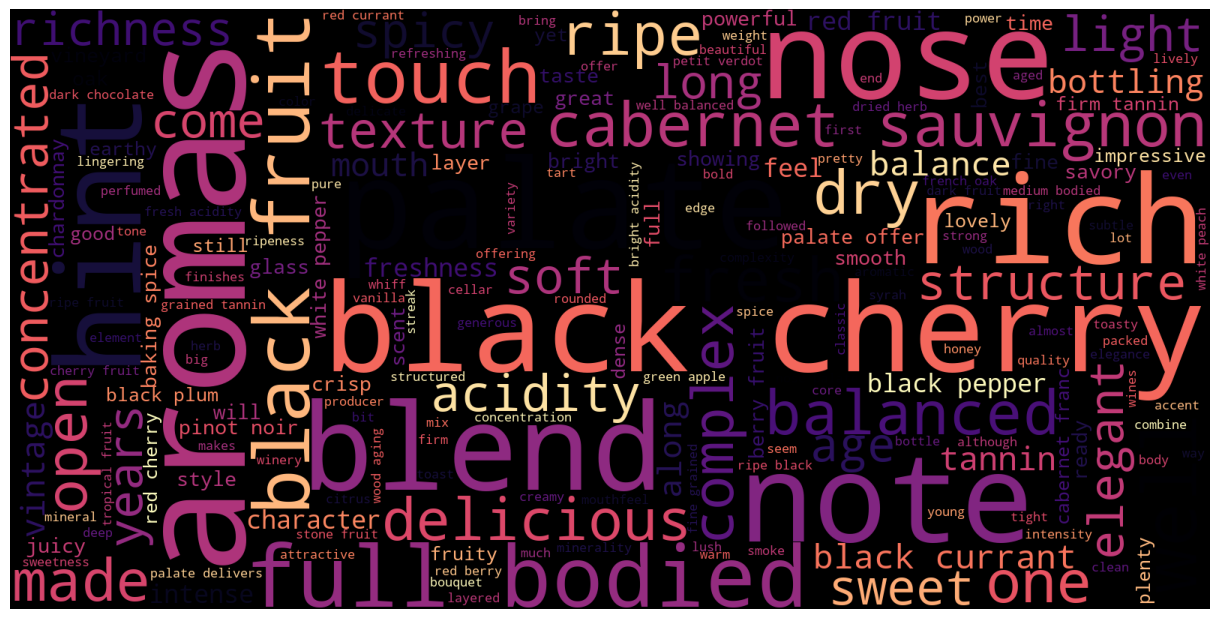

In [14]:
#use wordcloud for data visualization
#wordcloud for positive descriptions

from wordcloud import WordCloud, STOPWORDS 
from PIL import ImageDraw
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in description_pos_list: 
    val = str(val) 
    tokens = val.split() 
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,
                colormap='magma',
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

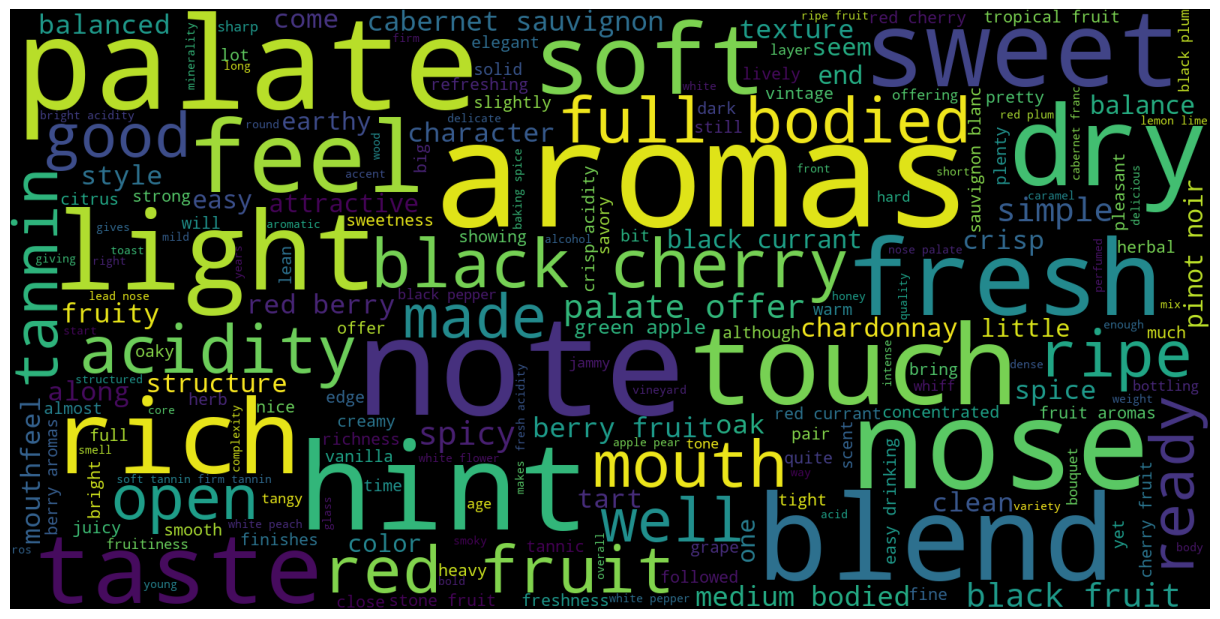

In [15]:
#wordcloud for negative descriptions

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in description_neg_list: 
    val = str(val) 
    tokens = val.split() 
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Country

In [16]:
Country = data["country"]

In [17]:
Country.describe()

count     129908
unique        43
top           US
freq       54504
Name: country, dtype: object

In [18]:
Country.value_counts()

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [19]:
#Top 10 most frequent country
top_10_countries = Country.value_counts().head(10).index
print(top_10_countries)

Index(['US', 'France', 'Italy', 'Spain', 'Portugal', 'Chile', 'Argentina',
       'Austria', 'Australia', 'Germany'],
      dtype='object', name='country')


## Province

In [20]:
Province = data["province"]

In [21]:
Province.describe()

count         129908
unique           425
top       California
freq           36247
Name: province, dtype: object

In [22]:
#Top 30 most frequent provinces
top_30_provinces = Province.value_counts().head(30).index
print("Top 30 most frequent provinces are",top_30_provinces)

#Their corresponding country
top_30_countries = data[Province.isin(top_30_provinces)].groupby('province')['country'].first().reset_index()
top_countries = top_30_countries.iloc[:,1].drop_duplicates()
print("Their corresponding countries are",top_countries)

Top 30 most frequent provinces are Index(['California', 'Washington', 'Bordeaux', 'Tuscany', 'Oregon', 'Burgundy',
       'Northern Spain', 'Piedmont', 'Mendoza Province', 'Veneto', 'New York',
       'Alsace', 'Northeastern Italy', 'Loire Valley', 'Sicily & Sardinia',
       'Champagne', 'Southwest France', 'South Australia', 'Southern Italy',
       'Provence', 'Douro', 'Central Italy', 'Catalonia', 'Rhône Valley',
       'Beaujolais', 'Mosel', 'Alentejano', 'Colchagua Valley', 'Marlborough',
       'Virginia'],
      dtype='object', name='province')
Their corresponding countries are 0        Portugal
1          France
5              US
6           Spain
7           Italy
9           Chile
12    New Zealand
13      Argentina
14        Germany
23      Australia
Name: country, dtype: object


## Variety

In [23]:
Variety = data["variety"]

In [24]:
#create postive variety word dictionary
variety_pos_list = []
variety_neg_list = []
for i in range(data.shape[0]):
    if Classify[i] == 1:
        variety_pos_list.append(Variety.iloc[i])
    else:
        variety_neg_list.append(Variety.iloc[i])

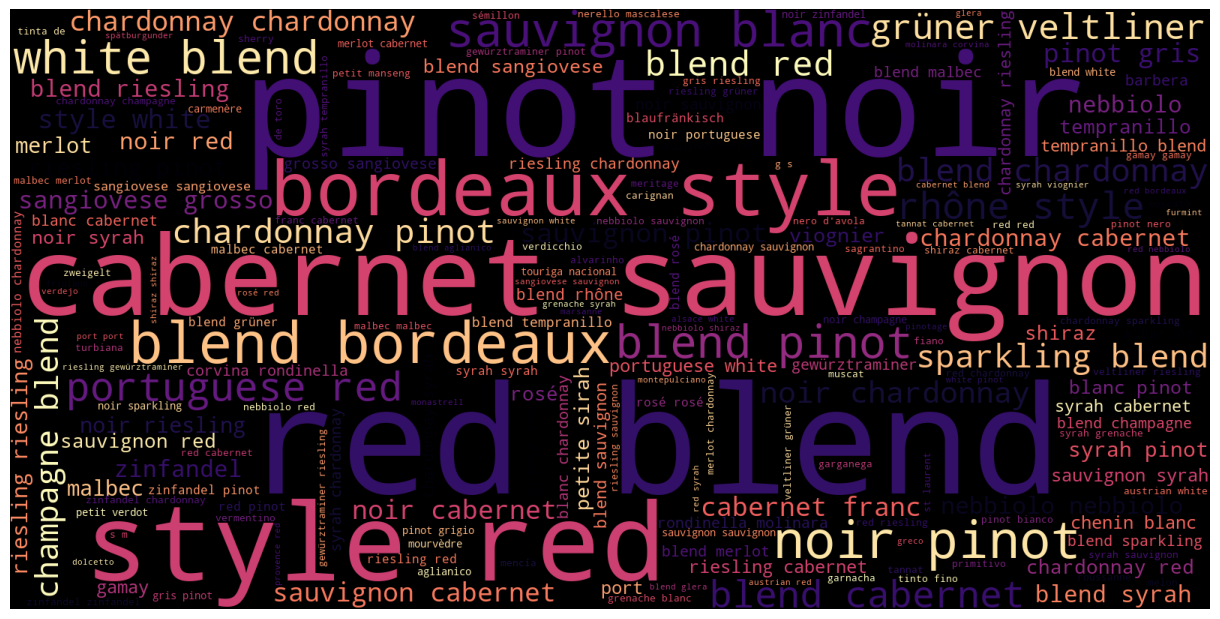

In [25]:
#use wordcloud for data visualization
#wordcloud for positive descriptions

from wordcloud import WordCloud, STOPWORDS 
from PIL import ImageDraw
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in variety_pos_list: 
    val = str(val) 
    tokens = val.split() 
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,
                colormap='magma',
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

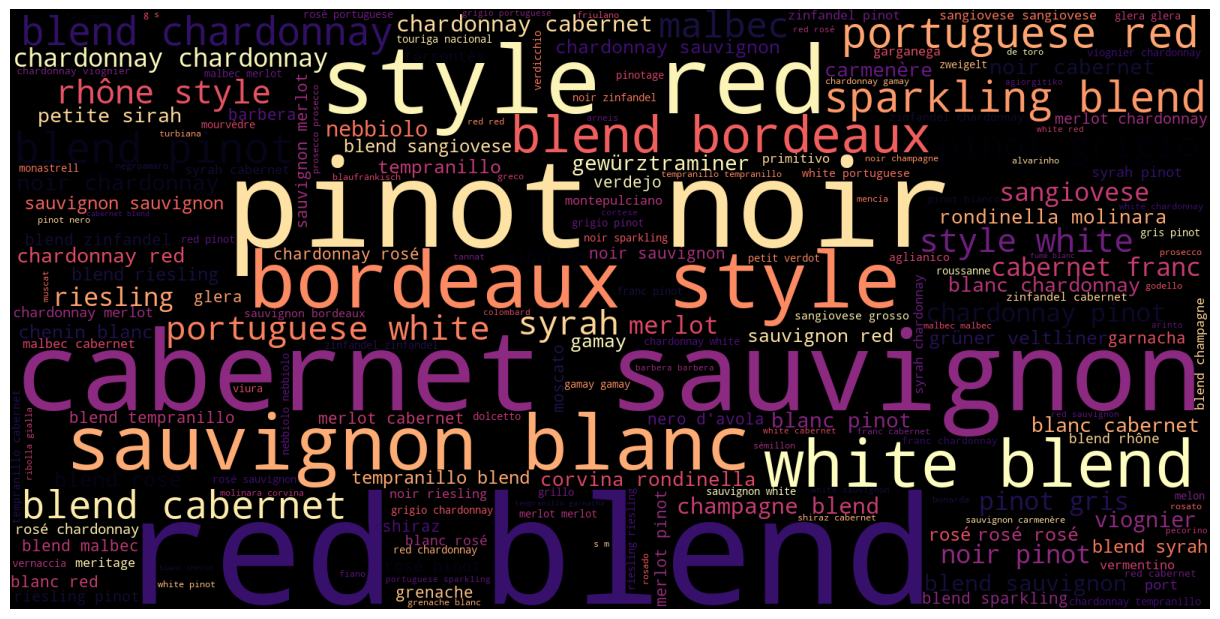

In [26]:
#use wordcloud for data visualization
#wordcloud for positive descriptions

from wordcloud import WordCloud, STOPWORDS 
from PIL import ImageDraw
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in variety_neg_list: 
    val = str(val) 
    tokens = val.split() 
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,
                colormap='magma',
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Winery

In [27]:
Winery = data["winery"]

In [28]:
#create winery word dictionary
winery_list = []
for i in range(data.shape[0]):
    if Classify[i] == 1:
        winery_list.append(Winery.iloc[i])

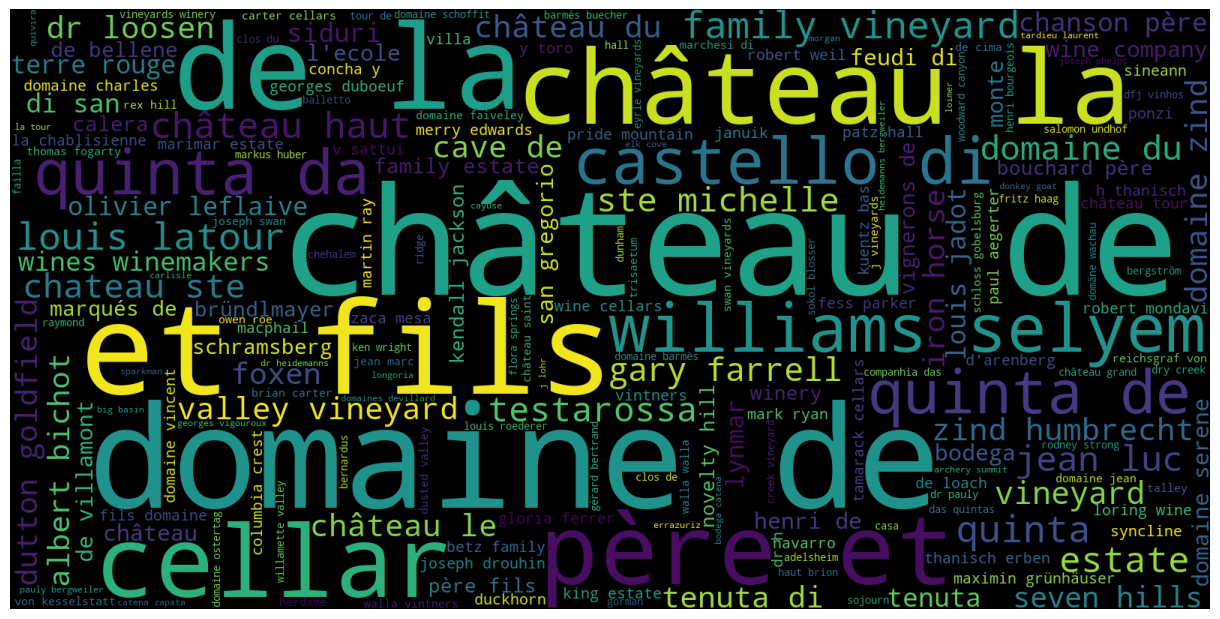

In [29]:
#wordcloud for winery

comment_words = '' 
stopwords = set(STOPWORDS) 

for val in winery_list: 
    val = str(val) 
    tokens = val.split() 
    
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Year from title

In [30]:
Title = data["title"]
print(Title.tolist())
Title_list = Title.tolist()
Year_list = []
for i in range(Title.shape[0]):
    #collect all the digit and only retain those are of YEAR form
    num = [int(s) for s in Title_list[i].split() if s.isdigit() and int(s)>1800]
    Year_list.append(num)
Yearr = pd.DataFrame(Year_list)
Year = Yearr.iloc[:,0]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [31]:
Year

0         2013.0
1         2011.0
2         2013.0
3         2013.0
4         2012.0
           ...  
129966    2013.0
129967    2004.0
129968    2013.0
129969    2012.0
129970    2012.0
Name: 0, Length: 129971, dtype: float64

#### Price

In [32]:
Price = data["price"]

In [33]:
Price.describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [34]:
print("maximum price is",Price.max())
print("minimum price is", Price.min())

maximum price is 3300.0
minimum price is 4.0


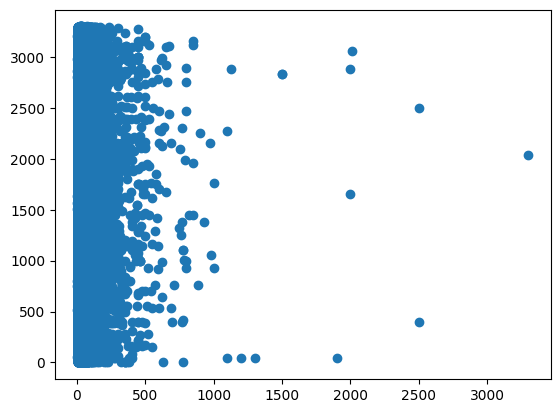

In [35]:
plt.scatter(Price,np.linspace(0,Price.max(),num=Price.shape[0]))

# Models and Predictions

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
df = pd.concat([data["country"], data["variety"], data["price"], pd.DataFrame(description_cleaned), Year, data["points"]],axis=1)
df.dropna(axis=0, inplace=True)
#Rename df
df.columns = ['country', 'variety', 'price', 'description', 'year', 'points']
df

,country,variety,price,description,year,points
1,Portugal,Portuguese Red,15.0,ripe fruity smooth while still structured firm...,2011.0,87
2,US,Pinot Gris,14.0,tart snappy of lime flesh rind dominate some g...,2013.0,87
3,US,Riesling,13.0,pineapple rind lemon pith orange blossom start...,2013.0,87
4,US,Pinot Noir,65.0,much like regular bottling from comes across a...,2012.0,87
5,Spain,Tempranillo-Merlot,15.0,blackberry raspberry aromas typical navarran w...,2011.0,87
...,...,...,...,...,...,...
129966,Germany,Riesling,28.0,notes of honeysuckle cantaloupe sweeten delici...,2013.0,90
129967,US,Pinot Noir,75.0,citation given as much as decade of bottle age...,2004.0,90
129968,France,Gewürztraminer,30.0,well drained gravel soil gives its crisp dry c...,2013.0,90
129969,France,Pinot Gris,32.0,dry style of pinot gris crisp with some acidit...,2012.0,90


In [38]:
X = df[['country', 'variety', 'price', 'description', 'year']]
y = df['points']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [39]:
df_train = pd.concat([X_train, y_train],axis=1)
df_test = pd.concat([X_test, y_test],axis=1)

## Preprocessing data and Speration

#### Vectorize natural language data using CountVectorizer

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(max_features = 500)
df_tr_vec = vec.fit_transform(df_train['description'])
df_te_vec = vec.fit_transform(df_test['description'])

#### Define encoding function for categorical predictors

In [41]:
def one_hot_encoding(x):
    return pd.get_dummies(x)
df_encoded = one_hot_encoding(df[['country']])
# number of columns: number of countries
print(df_encoded.shape)

(116777, 42)


In [42]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)

## Model training and selection

In [49]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
features = df[['country','price']]
features_encoded = one_hot_encoding(features)
labels = df[['points']]
features_train, features_test, labels_train, labels_test = sklearn.model_selection.train_test_split(features_encoded, labels, test_size=0.3)

#### Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(features_train, labels_train)
random_forest_predictions = random_forest_model.predict(features_test)

random_forest_MAE = mean_absolute_error(labels_test, random_forest_predictions)
print('MAE score for random forest model is', random_forest_MAE)
random_forest_MSE = mean_squared_error(labels_test, random_forest_predictions)
print('MSE score for random forest model is', random_forest_MSE)
print('RMAE score for random forest model is', np.sqrt(random_forest_MSE))
random_forest_r2 = r2_score(labels_test, random_forest_predictions)
print('R2 score for random forest model is', random_forest_r2)

C:\Users\周宜纬\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE score for random forest model is 1.8634890152059918
MSE score for random forest model is 5.543904661535549
RMAE score for random forest model is 2.3545497789461893
R2 score for random forest model is 0.4022243872025131


#### SVR

In [45]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(features_train, labels_train)
svr_predictions = random_forest_model.predict(features_test)

svr_MAE = mean_absolute_error(labels_test, svr_predictions)
print('MAE score for random forest model is', random_forest_MAE)
svr_MSE = mean_squared_error(labels_test, svr_predictions)
print('MSE score for random forest model is', svr_MSE)
print('RMAE score for random forest model is', np.sqrt(svr_MSE))
random_forest_r2 = r2_score(labels_test, random_forest_predictions)
print('R2 score for random forest model is', random_forest_r2)

C:\Users\周宜纬\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE score for SVR model is 5.543228188743971


#### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(features_train, labels_train)
linear_predictions = linear_model.predict(features_test)
linear_MSE = mean_squared_error(labels_test, linear_predictions)
print('MSE score for SVR model is', linear_MSE)

MSE score for SVR model is 7.152305934963752
